In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split

In [3]:
# import and process data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# organise the data

# convert from pandas df to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to numbers
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species == 'setosa'] = 0 not required as already zeroes are there
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [11]:
# Create the model
def createModel():
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3)
    )

    lossFunction = nn.CrossEntropyLoss() # SoftMax already included in the loss function

    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

    return ANNiris, lossFunction, optimizer

In [12]:
# train the model

epochs = 200
def trainModel(trainProportion, ANNiris, lossFunction, optimizer):
    losses = torch.zeros(epochs)
    trainAcc = []
    testAcc = []

    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=trainProportion)

    for epoch in range(epochs):
        yHat = ANNiris(train_data)

        loss = lossFunction(yHat, train_labels)
        losses[epoch] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        trainAcc.append( torch.mean((torch.argmax(yHat, axis=1) == train_labels).float()) * 100 )

        predictedLabels = ANNiris(test_data)
        testAcc.append(torch.mean((torch.argmax(predictedLabels, axis=1) == test_labels).float()) * 100)
    return trainAcc, testAcc


In [13]:
trainTestSize = np.linspace(0.2, 0.95, 10)

allTrainAcc = np.zeros((len(trainTestSize), epochs))
allTestAcc = np.zeros((len(trainTestSize), epochs))

for i in range(len(trainTestSize)):
    ANNiris, lossFunction, optimizer = createModel()
    trainAcc, testAcc = trainModel(trainTestSize[i], ANNiris, lossFunction, optimizer)
    allTrainAcc[i, :] = trainAcc
    allTestAcc[i, :] = testAcc


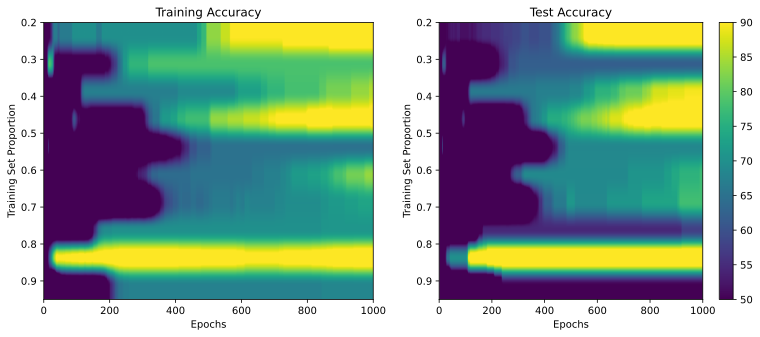

In [14]:
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(allTrainAcc, aspect='auto', vmin=50, vmax=90, extent=[0, epochs, trainTestSize[-1], trainTestSize[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training Set Proportion')
ax[0].set_title('Training Accuracy')

p = ax[1].imshow(allTestAcc, aspect='auto', vmin=50, vmax=90, extent=[0, epochs, trainTestSize[-1], trainTestSize[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training Set Proportion')
ax[1].set_title('Test Accuracy')

fig.colorbar(p, ax=ax[1])

plt.show()